<a href="https://colab.research.google.com/github/auliakharis/WSEEC-Student-Clustering/blob/main/WSEEC_Ver_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
 
df = pd.read_csv("/content/sample_data/student-mat.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
categorical = ['school',\
               'sex',\
               'address',\
               'famsize',\
               'Pstatus',\
               'Mjob',\
               'Fjob',\
               'reason',\
               'guardian',\
               'schoolsup',\
               'famsup',\
               'paid',\
               'activities',\
               'nursery',\
               'higher',\
               'internet',\
               'romantic',
                ]

In [ ]:
#transform non-numerical labels to numerical labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[categorical] = df[categorical].apply(lambda col: le.fit_transform(col))
df[categorical].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


In [ ]:
modal = df
modal.head()



,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [ ]:
df.iloc[:,32]

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

              school       sex       age  ...        G1        G2        G3
school      1.000000 -0.012286  0.377610  ... -0.025731 -0.050086 -0.045017
sex        -0.012286  1.000000 -0.028606  ...  0.091839  0.091099  0.103456
age         0.377610 -0.028606  1.000000  ... -0.064081 -0.143474 -0.161579
address    -0.279797 -0.028504 -0.146722  ...  0.069704  0.126037  0.105756
famsize     0.064866  0.089862  0.037847  ...  0.071445  0.081223  0.081407
Pstatus     0.045923  0.023443  0.029598  ... -0.016868 -0.041382 -0.058009
Medu       -0.133333  0.078228 -0.163658  ...  0.205341  0.215527  0.217147
Fedu       -0.079807  0.034878 -0.163438  ...  0.190270  0.164893  0.152457
Mjob       -0.056670  0.191421 -0.069104  ...  0.081674  0.097390  0.102082
Fjob        0.018974  0.084957 -0.035191  ...  0.057661  0.067006  0.042286
reason     -0.090010 -0.095867 -0.015337  ...  0.099491  0.117775  0.121994
guardian    0.011109 -0.071343  0.290485  ... -0.041727 -0.087495 -0.070109
traveltime  

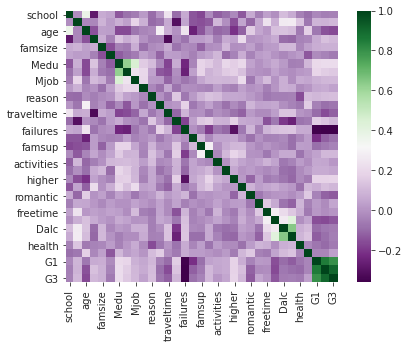

In [ ]:
cor = modal.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(cor, vmax=1, square=True, cmap="PRGn")
print(cor)

In [ ]:
modal_array = np.array(modal)

In [ ]:
print(modal_array)

[[ 0  0 18 ...  5  6  6]
 [ 0  0 17 ...  5  5  6]
 [ 0  0 15 ...  7  8 10]
 ...
 [ 1  1 21 ... 10  8  7]
 [ 1  1 18 ... 11 12 10]
 [ 1  1 19 ...  8  9  9]]


In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=42)

In [ ]:

print(modal_array)

[[ 0  0 18 ...  5  6  6]
 [ 0  0 17 ...  5  5  6]
 [ 0  0 15 ...  7  8 10]
 ...
 [ 1  1 21 ... 10  8  7]
 [ 1  1 18 ... 11 12 10]
 [ 1  1 19 ...  8  9  9]]


In [ ]:
kmeans.fit(modal_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
print(kmeans.cluster_centers_)

[[ 0.13548387  0.4        16.73548387  0.73548387  0.24516129  0.92258065
   2.47096774  2.29032258  2.01290323  2.24516129  1.02580645  0.87741935
   1.5483871   2.          0.5483871   0.19354839  0.6516129   0.41290323
   0.49677419  0.8         0.90967742  0.78709677  0.34193548  4.00645161
   3.20645161  3.26451613  1.43870968  2.29677419  3.5483871   3.09677419
   8.11612903  7.6         6.66451613]
 [ 0.12154696  0.55248619 16.46961326  0.79005525  0.30939227  0.88950276
   2.93370166  2.70165746  2.28176796  2.33701657  1.38674033  0.79005525
   1.38674033  2.15469613  0.07734807  0.0718232   0.56353591  0.50828729
   0.5359116   0.78453039  0.98895028  0.84530387  0.27624309  3.94475138
   3.26519337  2.91160221  1.43646409  2.13259669  3.5801105   3.33701657
  13.50276243 13.64640884 13.79558011]
 [ 0.05084746  0.42372881 17.28813559  0.84745763  0.33898305  0.84745763
   2.91525424  2.57627119  2.23728814  2.20338983  1.45762712  0.98305085
   1.37288136  1.76271186  0.55932

In [ ]:
labels = kmeans.fit_predict(modal_array)
print(labels)
df['kluster'] = kmeans.labels_

[0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 2 0 1 1 1 1 0 2 1 1 1 2 1 1 1 0 1 0 1
 1 1 1 2 1 1 0 2 0 2 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1
 2 0 1 1 0 0 1 1 0 1 0 0 0 1 2 2 0 1 0 0 1 0 1 0 1 0 2 1 1 2 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 2 1 1 1 1 2 0 1 0 0 0 1 0 0 2 2 0 0 0 0 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 2 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 2 2
 2 1 1 0 0 1 0 2 0 1 1 1 0 2 0 1 0 0 2 0 2 0 1 0 0 0 2 1 2 2 1 2 2 0 0 0 0
 1 1 1 2 1 1 2 1 2 1 2 1 2 0 1 2 1 0 2 1 0 1 0 1 1 2 0 1 0 0 0 0 1 0 1 2 1
 0 2 0 1 0 0 1 0 1 0 0 2 1 1 1 0 1 2 2 2 0 2 2 1 0 0 1 1 1 1 1 1 1 2 1 1 1
 0 0 1 1 2 1 1 1 2 1 1 2 1 2 0 2 1 2 2 2 0 0 1 1 2 2 1 1 1 1 1 0 0 1 0 1 0
 0 0 2 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 0 1 1 2 1 0 1 0 1 2 1 0 1 0 2 0 0 0 0 0 0 1 0 1 0]


In [ ]:
df.head()
print(modal_array[:,0:4])
centers = kmeans.cluster_centers_

[[ 0  0 18  1]
 [ 0  0 17  1]
 [ 0  0 15  1]
 ...
 [ 1  1 21  0]
 [ 1  1 18  0]
 [ 1  1 19  1]]


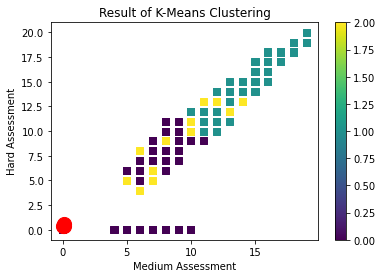

In [ ]:
output = plt.scatter(modal_array[:,31], modal_array[:,32], s = 50, c =df.kluster , marker = 's', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title('Result of K-Means Clustering')
plt.ylabel('Hard Assessment')
plt.xlabel('Medium Assessment')
plt.colorbar (output)
plt.show()

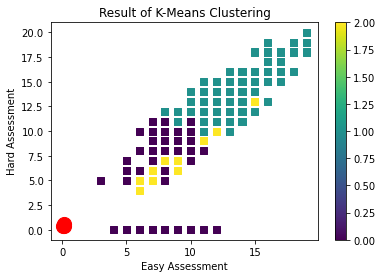

In [ ]:
output = plt.scatter(modal_array[:,30], modal_array[:,32], s = 50, c =df.kluster , marker = 's', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title('Result of K-Means Clustering')
plt.xlabel('Easy Assessment')
plt.ylabel('Hard Assessment')
plt.colorbar (output)
plt.show()

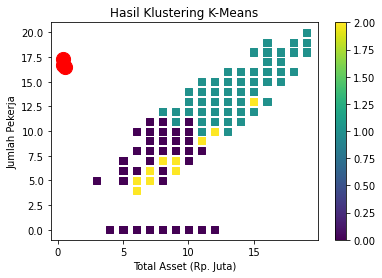

In [ ]:
output = plt.scatter(modal_array[:,30], modal_array[:,32], s = 50, c = df.kluster, marker = 's', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,2], c='red', s=200, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means')
plt.xlabel('Total Asset (Rp. Juta)')
plt.ylabel('Jumlah Pekerja')
plt.colorbar (output)
plt.show()

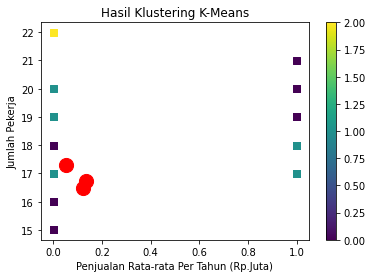

In [ ]:
output = plt.scatter(modal_array[:,0], modal_array[:,2], s = 50, c = df.kluster, marker = 's', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,2], c='red', s=200, alpha=1 , marker='o');
plt.title('Hasil Klustering K-Means')
plt.xlabel('Penjualan Rata-rata Per Tahun (Rp.Juta)')
plt.ylabel('Jumlah Pekerja')
plt.colorbar (output)
plt.show()

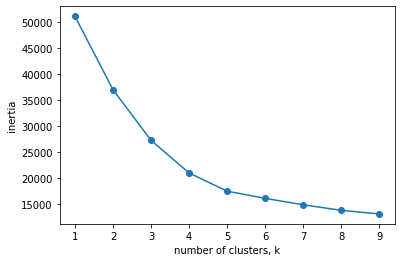

In [ ]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters =k)
    
    # Fit model to samples
    model.fit(modal_array)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [ ]:
print(inertias)

[51076.72405063291, 36966.82387651057, 27226.75029859628, 20947.623116963543, 17447.884002932617, 16064.783889662765, 14829.488823158481, 13757.592106190048, 13071.391392787387]


In [ ]:
kluster1 = df[df['kluster']==0]

In [ ]:
print(kluster1)

     school  sex  age  address  famsize  ...  absences  G1  G2  G3  kluster
0         0    0   18        1        0  ...         6   5   6   6        0
1         0    0   17        1        0  ...         4   5   5   6        0
2         0    0   15        1        1  ...        10   7   8  10        0
4         0    0   16        1        0  ...         4   6  10  10        0
7         0    0   17        1        0  ...         6   6   5   6        0
..      ...  ...  ...      ...      ...  ...       ...  ..  ..  ..      ...
388       1    0   18        1        1  ...         0   7   9   8        0
389       1    0   18        1        0  ...         0   6   5   0        0
390       1    1   20        1        1  ...        11   9   9   9        0
392       1    1   21        0        0  ...         3  10   8   7        0
394       1    1   19        1        1  ...         5   8   9   9        0

[155 rows x 34 columns]


In [ ]:
kluster1.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,kluster
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0
mean,0.135484,0.400000,16.735484,0.735484,0.245161,0.922581,2.470968,2.290323,2.012903,2.245161,1.025806,0.877419,1.548387,2.000000,0.548387,0.193548,0.651613,0.412903,0.496774,0.800000,0.909677,0.787097,0.341935,4.006452,3.206452,3.264516,1.438710,2.296774,3.548387,3.096774,8.116129,7.600000,6.664516,0.0
std,0.343349,0.491486,1.324482,0.442505,0.431577,0.268122,1.100824,1.044265,1.299286,0.800503,1.178533,0.550507,0.791132,0.821781,0.974970,0.396360,0.478004,0.493952,0.501610,0.401297,0.287573,0.410687,0.475896,0.833525,0.916634,1.128598,0.781971,1.290194,1.315213,3.278767,1.670815,2.776525,4.050457,0.0
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,7.000000,7.000000,5.000000,0.0
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,8.000000,8.000000,8.000000,0.0
75%,0.000000,1.000000,18.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.500000,10.000000,9.000000,10.000000,0.0
max,1.000000,1.000000,21.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,11.000000,12.000000,0.0


In [ ]:
kluster2 = df[df['kluster']==1]

In [ ]:
kluster2.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,kluster
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.0
mean,0.121547,0.552486,16.469613,0.790055,0.309392,0.889503,2.933702,2.701657,2.281768,2.337017,1.386740,0.790055,1.386740,2.154696,0.077348,0.071823,0.563536,0.508287,0.535912,0.784530,0.988950,0.845304,0.276243,3.944751,3.265193,2.911602,1.436464,2.132597,3.580110,3.337017,13.502762,13.646409,13.795580,1.0
std,0.327668,0.498617,1.190431,0.408399,0.463525,0.314378,1.078075,1.100226,1.184694,0.920272,1.231368,0.505646,0.618817,0.905749,0.287877,0.258911,0.497322,0.501318,0.500092,0.412288,0.104825,0.362618,0.448379,0.935258,0.997972,1.007157,0.864482,1.212934,1.445469,3.269762,2.298851,2.120495,2.318328,0.0
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.000000,10.000000,10.000000,1.0
25%,0.000000,0.000000,15.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,12.000000,12.000000,12.000000,1.0
50%,0.000000,1.000000,16.000000,1.000000,0.000000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,13.000000,13.000000,14.000000,1.0
75%,0.000000,1.000000,17.000000,1.000000,1.000000,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,15.000000,15.000000,15.000000,1.0
max,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,13.000000,19.000000,19.000000,20.000000,1.0


In [ ]:
kluster3 = df[df['kluster']==2]
kluster3.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,kluster
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,0.050847,0.423729,17.288136,0.847458,0.338983,0.847458,2.915254,2.576271,2.237288,2.203390,1.457627,0.983051,1.372881,1.762712,0.559322,0.135593,0.661017,0.423729,0.457627,0.813559,0.932203,0.915254,0.491525,3.779661,3.220339,3.305085,1.728814,2.762712,3.491525,19.847458,10.288136,9.898305,9.898305,2.0
std,0.221572,0.498390,1.218406,0.362632,0.477427,0.362632,0.987650,1.070021,1.134703,0.846487,1.134446,0.572096,0.640536,0.567480,0.771724,0.345295,0.477427,0.498390,0.502478,0.392805,0.253555,0.280894,0.504219,0.929735,1.204414,1.289938,1.171950,1.406132,1.430853,11.585981,2.965612,2.874951,2.969354,0.0
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000,5.000000,4.000000,2.0
25%,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,14.000000,8.000000,8.000000,8.000000,2.0
50%,0.000000,0.000000,17.000000,1.000000,0.000000,1.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,3.000000,3.000000,16.000000,10.000000,10.000000,10.000000,2.0
75%,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.500000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,2.000000,4.000000,5.000000,20.500000,12.000000,12.000000,12.000000,2.0
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,18.000000,18.000000,18.000000,2.0


In [ ]:
df.to_csv("df_kluster.csv")